<a href="https://colab.research.google.com/github/achellesheel/blogpc114/blob/main/Cyclistics_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Problem statement**: The company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently.




**Prepare** Now, extracting files from cyclist webpage of all 12 months and uzipping them and combining them in "full_year" variable.

In [1]:
import os
import pandas as pd
import requests
import zipfile
from io import BytesIO

# Base URL for the datasets
base_url = "https://divvy-tripdata.s3.amazonaws.com/"
file_names = [f"2024{month:02d}-divvy-tripdata.zip" for month in range(1, 13)]

# Directory to store downloaded files (optional)
os.makedirs("divvy_data", exist_ok=True)

# Combine datasets into a single DataFrame
data_frames = []

for file_name in file_names:
    print(f"Downloading {file_name}...")

    # Download the ZIP file
    url = f"{base_url}{file_name}"
    response = requests.get(url)
    response.raise_for_status()  # Ensure the request was successful

    # Extract the ZIP file
    with zipfile.ZipFile(BytesIO(response.content)) as z:
        # Assuming there's only one CSV file in each ZIP
        csv_file = z.namelist()[0]
        print(f"Extracting {csv_file}...")
        z.extract(csv_file, path="divvy_data")

        # Load the CSV into a DataFrame
        file_path = os.path.join("divvy_data", csv_file)
        df = pd.read_csv(file_path)

        # Append the DataFrame to the list
        data_frames.append(df)

# Combine all DataFrames into a single DataFrame
print("Combining all datasets into 'full_year'...")
full_year = pd.concat(data_frames, ignore_index=True)

# Optional: Save the combined dataset to a file
full_year.to_csv("divvy_full_year.csv", index=False)
print("Full-year data saved as 'divvy_full_year.csv'.")


Extracting 202401-divvy-tripdata.csv...
Extracting 202402-divvy-tripdata.csv...
Extracting 202403-divvy-tripdata.csv...
Extracting 202404-divvy-tripdata.csv...
Extracting 202405-divvy-tripdata.csv...
Extracting 202406-divvy-tripdata.csv...
Extracting 202407-divvy-tripdata.csv...
Extracting 202408-divvy-tripdata.csv...
Extracting 202409-divvy-tripdata.csv...
Extracting 202410-divvy-tripdata.csv...
Extracting 202411-divvy-tripdata.csv...
Extracting 202412-divvy-tripdata.csv...
Combining all datasets into 'full_year'...
Full-year data saved as 'divvy_full_year.csv'.


Taking an overview of the dataset

In [2]:
import pandas as pd

# Load the combined dataset (if already saved as a CSV)
full_year = pd.read_csv("divvy_full_year.csv")

# General Overview
print("Dataset Overview:")
print(f"Number of rows: {full_year.shape[0]}")
print(f"Number of columns: {full_year.shape[1]}")
print("\nColumn Information:")
print(full_year.info())

# Statistical Summary for Numeric Columns
print("\nStatistical Summary for Numeric Columns:")
print(full_year.describe())

# Check for Missing Values
print("\nMissing Values per Column:")
print(full_year.isnull().sum())

# Unique Values in Categorical Columns
print("\nUnique Values in Categorical Columns:")
categorical_columns = full_year.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {full_year[col].nunique()} unique values")

# Example: Top 5 Most Frequent Categories for a Specific Column (e.g., "start_station_name")
if 'start_station_name' in full_year.columns:
    print("\nTop 5 Start Stations:")
    print(full_year['start_station_name'].value_counts().head(5))

# Example: Trip Duration Analysis
if 'tripduration' in full_year.columns:
    print("\nTrip Duration Analysis (in minutes):")
    full_year['tripduration'] = full_year['tripduration'] / 60  # Convert seconds to minutes
    print(full_year['tripduration'].describe())

# Example: Distribution of User Types (if applicable)
if 'user_type' in full_year.columns:
    print("\nUser Type Distribution:")
    print(full_year['user_type'].value_counts())


Dataset Overview:
Number of rows: 5860568
Number of columns: 13

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860568 entries, 0 to 5860567
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 581.3+ MB
None

Statistical Summary for Numeric Columns:
          start_lat     start_lng       end_lat       end_lng
count  5.860568e+06  5.860568e+06  5.853336e+06  5.853336e+06
mean   4.190218e+01 -8.764622e+01  4.190258e+01 -8.764644e+01
std    4.474907e-02 

Now, drop missing values using dropna()

In [3]:
import pandas as pd

# Load the combined dataset (if not already loaded)
full_year = pd.read_csv("divvy_full_year.csv")

# Display the number of missing values before dropping
print("Missing Values per Column Before Dropping:")
print(full_year.isnull().sum())

# Drop rows with missing values
full_year_cleaned = full_year.dropna()

# Display the number of rows after dropping missing values
print("\nNumber of rows before dropping missing values:", full_year.shape[0])
print("Number of rows after dropping missing values:", full_year_cleaned.shape[0])

# Save the cleaned dataset (optional)
full_year_cleaned.to_csv("divvy_full_year_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'divvy_full_year_cleaned.csv'.")


Missing Values per Column Before Dropping:
ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
start_station_id      1073951
end_station_name      1104653
end_station_id        1104653
start_lat                   0
start_lng                   0
end_lat                  7232
end_lng                  7232
member_casual               0
dtype: int64

Number of rows before dropping missing values: 5860568
Number of rows after dropping missing values: 4208309

Cleaned dataset saved as 'divvy_full_year_cleaned.csv'.


**PROBLEM**: the station_id columns (start and end both) are in the wrong data type (chr) needs to be converted to numeric to perform analysis##


In [4]:
import pandas as pd

# Load the cleaned dataset
full_year_cleaned = pd.read_csv("divvy_full_year_cleaned.csv")

# Convert station_id columns to numeric
full_year_cleaned['start_station_id'] = pd.to_numeric(full_year_cleaned['start_station_id'], errors='coerce')
full_year_cleaned['end_station_id'] = pd.to_numeric(full_year_cleaned['end_station_id'], errors='coerce')

# Check the data types of the columns
print(full_year_cleaned.dtypes)

# Check for any rows with missing values after conversion (due to coercion)
print("Missing values after type conversion:")
print(full_year_cleaned[['start_station_id', 'end_station_id']].isnull().sum())

# Save the updated dataset (optional)
full_year_cleaned.to_csv("divvy_full_year_cleaned_v01.csv", index=False)
print("\nUpdated dataset saved as 'divvy_full_year_cleaned_v01.csv'.")


ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object
Missing values after type conversion:
start_station_id    2289915
end_station_id      2292582
dtype: int64

Updated dataset saved as 'divvy_full_year_cleaned_v01.csv'.


# Other problems that need to be addressed:
## (1) The data can only be aggregated at the ride-level, which is too granular.
## adding some additional columns of data such as day, month, year improves the analysis,
## it provides additional opportunities to aggregate the data.
## Because of the settings of my laptop R automatically formats the days of the weeks in Dutch. Have not found a workaround to change this!

In [5]:
import pandas as pd

# Load the dataset
full_year_cleaned = pd.read_csv("divvy_full_year_cleaned.csv")

# Ensure 'started_at' is in datetime format
full_year_cleaned['date'] = pd.to_datetime(full_year_cleaned['started_at'], errors='coerce')

# Extract month, day, year, and day_of_week
full_year_cleaned['month'] = full_year_cleaned['date'].dt.month
full_year_cleaned['month_day'] = full_year_cleaned['date'].dt.day
full_year_cleaned['year'] = full_year_cleaned['date'].dt.year
full_year_cleaned['day_of_week'] = full_year_cleaned['date'].dt.day_name()

# Check the data structure
print(full_year_cleaned.info())

# Save the updated dataset (optional)
full_year_cleaned.to_csv("divvy_full_year_cleaned_v02.csv", index=False)
print("\nUpdated dataset saved as 'divvy_full_year_cleaned_v02.csv'.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208309 entries, 0 to 4208308
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  date                datetime64[ns]
 14  month               float64       
 15  month_day           float64       
 16  year                float64       
 17  day_of_week         object        
dtypes: datetime64[ns](1), float64(7), object(10)
memory usage: 577.9+ MB
None

Updated

## (2) The ride length_column holds a date PLUS the time, I only want to preserve the time part of the column
## Alternative: used the timediff function to calculate the ridelength and dropping the existing ride_length column

In [36]:
import pandas as pd

# Load the dataset
full_year_cleaned = pd.read_csv("divvy_full_year_cleaned_v02.csv")

# Ensure 'started_at' and 'ended_at' are in datetime format
full_year_cleaned['started_at'] = pd.to_datetime(full_year_cleaned['started_at'], errors='coerce')
full_year_cleaned['ended_at'] = pd.to_datetime(full_year_cleaned['ended_at'], errors='coerce')

# Step 1: Drop the existing 'ride_length' column if it exists
if 'ride_length' in full_year_cleaned.columns:
    full_year_cleaned.drop(columns=['ride_length'], inplace=True)

# Step 2: Add a new 'ride_length' column
# Calculate the difference in time between 'ended_at' and 'started_at'
full_year_cleaned['ride_length'] = (full_year_cleaned['ended_at'] - full_year_cleaned['started_at']).dt.total_seconds()

# Step 3: Inspect the structure of the dataset
print(full_year_cleaned.info())
print(full_year_cleaned[['started_at', 'ended_at', 'ride_length']].head())

# Save the updated dataset (optional)
full_year_cleaned.to_csv("divvy_full_year_cleaned_v03.csv", index=False)
print("\nUpdated dataset saved as 'divvy_full_year_cleaned_v03.csv'.")


<ipython-input-36-d65a66dcf992>:4: DtypeWarning: Columns (13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  full_year_cleaned = pd.read_csv("divvy_full_year_cleaned_v02.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208309 entries, 0 to 4208308
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  date                object        
 14  month               float64       
 15  month_day           float64       
 16  year                float64       
 17  day_of_week         object        
 18  ride_length         float64       
dtypes: datetime64[ns](2), float64(8), object(9

Check if ride_length is numeric:

In [37]:
# Check if 'ride_length' is numeric
print(full_year_cleaned['ride_length'].dtype)

float64


To filter rows where the start_station_name is "HQ QR", use the following code:



In [38]:
# Filter rows where start_station_name is "HQ QR"
filtered_data = full_year_cleaned[full_year_cleaned['start_station_name'] == "HQ QR"]

# Display the filtered data
print(filtered_data)

# Check the number of rows filtered
print(f"Number of rides starting at HQ QR: {len(filtered_data)}")


Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, date, month, month_day, year, day_of_week, ride_length]
Index: []
Number of rides starting at HQ QR: 0


# Remove "bad" data
# The dataframe includes entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative

In [39]:
# Remove "bad" data
# Condition: Exclude rows where start_station_name is "HQ QR" or ride_length < 1
full_year_cleaned = full_year_cleaned[
    ~((full_year_cleaned['start_station_name'] == "HQ QR") | (full_year_cleaned['ride_length'] < 1))
]

# Check for missing values
missing_values_count = full_year_cleaned.isna().sum().sum()
print(f"Total missing values: {missing_values_count}")

# Display cleaned dataset structure and first few rows
print(full_year_cleaned.info())  # Structure of the dataframe
print(full_year_cleaned.head())  # Preview first few rows


Total missing values: 23516168
<class 'pandas.core.frame.DataFrame'>
Index: 4208122 entries, 0 to 4208308
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  date                object        
 14  month               float64       
 15  month_day           float64       
 16  year                float64       
 17  day_of_week         object        
 18  ride_length         float64       
dtypes: datetime64[ns

# Descriptive analysis

In [40]:
# Descriptive analysis on ride_length (all values in seconds, then converted to minutes)
mean_ride_length_minutes = full_year_cleaned['ride_length'].mean() / 60
median_ride_length_minutes = full_year_cleaned['ride_length'].median() / 60
max_ride_length_minutes = full_year_cleaned['ride_length'].max() / 60
min_ride_length_minutes = full_year_cleaned['ride_length'].min() / 60

# Print results
print(f"Mean Ride Length: {mean_ride_length_minutes} minutes")
print(f"Median Ride Length: {median_ride_length_minutes} minutes")
print(f"Max Ride Length: {max_ride_length_minutes} minutes")
print(f"Min Ride Length: {min_ride_length_minutes} minutes")


Mean Ride Length: 15.874831421910171 minutes
Median Ride Length: 9.533333333333333 minutes
Max Ride Length: 1509.3666666666666 minutes
Min Ride Length: 0.016666666666666666 minutes


# Discovered that the max ride_length is longer than 24 hours! (58720 minutes / >40 days!) This skews the results of the analysis.
## Set a limit to the max amount of time that a bike could be used to 24 hours (<86400 seconds)

In [41]:
# Remove rows where ride_length is greater than 86,400 seconds (24 hours)
full_year_cleaned = full_year_cleaned[full_year_cleaned['ride_length'] <= 86400]

# Verify by checking the first few rows and the structure
print(full_year_cleaned.head())
print(full_year_cleaned.info())


            ride_id  rideable_type          started_at            ended_at  \
0  C1D650626C8C899A  electric_bike 2024-01-12 15:30:27 2024-01-12 15:37:59   
1  EECD38BDB25BFCB0  electric_bike 2024-01-08 15:45:46 2024-01-08 15:52:59   
2  F4A9CE78061F17F7  electric_bike 2024-01-27 12:27:19 2024-01-27 12:35:19   
3  0A0D9E15EE50B171   classic_bike 2024-01-29 16:26:17 2024-01-29 16:56:06   
4  33FFC9805E3EFF9A   classic_bike 2024-01-31 05:43:23 2024-01-31 06:09:35   

           start_station_name start_station_id           end_station_name  \
0           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
1           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
2           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
3      Wells St & Randolph St     TA1305000030  Larrabee St & Webster Ave   
4  Lincoln Ave & Waveland Ave            13253   Kingsbury St & Kinzie St   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_

In [42]:
# Convert ride_length to minutes
full_year_cleaned['ride_length_minutes'] = full_year_cleaned['ride_length'] / 60

# Group by 'member_casual' and calculate mean, median, max, and min
mean_ride_length = full_year_cleaned.groupby('member_casual')['ride_length_minutes'].mean()
median_ride_length = full_year_cleaned.groupby('member_casual')['ride_length_minutes'].median()
max_ride_length = full_year_cleaned.groupby('member_casual')['ride_length_minutes'].max()
min_ride_length = full_year_cleaned.groupby('member_casual')['ride_length_minutes'].min()

# Print results
print("Mean Ride Length by User Type:")
print(mean_ride_length)

print("\nMedian Ride Length by User Type:")
print(median_ride_length)

print("\nMax Ride Length by User Type:")
print(max_ride_length)

print("\nMin Ride Length by User Type:")
print(min_ride_length)


Mean Ride Length by User Type:
member_casual
casual    24.181936
member    12.218811
Name: ride_length_minutes, dtype: float64

Median Ride Length by User Type:
member_casual
casual    13.166667
member     8.483333
Name: ride_length_minutes, dtype: float64

Max Ride Length by User Type:
member_casual
casual    1439.833333
member    1437.766667
Name: ride_length_minutes, dtype: float64

Min Ride Length by User Type:
member_casual
casual    0.016667
member    0.016667
Name: ride_length_minutes, dtype: float64


In [43]:
# Group by 'member_casual' and 'day_of_week', then calculate the mean ride length
avg_ride_time_by_day = full_year_cleaned.groupby(['member_casual', 'day_of_week'])['ride_length_minutes'].mean().reset_index()

# Print the results
print(avg_ride_time_by_day)


   member_casual day_of_week  ride_length_minutes
0         casual      Friday            22.709605
1         casual      Monday            24.181812
2         casual    Saturday            27.918076
3         casual      Sunday            28.562092
4         casual    Thursday            19.409630
5         casual     Tuesday            20.629669
6         casual   Wednesday            21.058903
7         member      Friday            11.628880
8         member      Monday            11.813612
9         member    Saturday            14.007320
10        member      Sunday            13.645731
11        member    Thursday            11.419769
12        member     Tuesday            11.949540
13        member   Wednesday            11.958688


In [44]:
# Strip leading/trailing spaces and convert to proper case
full_year_cleaned['day_of_week'] = full_year_cleaned['day_of_week'].str.strip().str.capitalize()

# Reorder days of the week to match the correct English names
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Apply categorical ordering
full_year_cleaned['day_of_week'] = pd.Categorical(full_year_cleaned['day_of_week'], categories=day_order, ordered=True)

# Check the first few entries to confirm correct ordering
print(full_year_cleaned['day_of_week'].head())



0       Friday
1       Monday
2     Saturday
3       Monday
4    Wednesday
Name: day_of_week, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' <
                         'Sunday']


# Check if 'day_of_week' is an ordered category


In [45]:
# Check if 'day_of_week' is an ordered category
full_year_cleaned2 = full_year_cleaned
full_year_cleaned['day_of_week'] = pd.Categorical(full_year_cleaned['day_of_week'],
                                                  categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

# Now perform the aggregation and check for the average ride length by each day for members vs casual users
result = full_year_cleaned.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()

# Output the result to confirm it's in the correct order
print(result)


   member_casual day_of_week  ride_length
0         casual      Monday  1450.908723
1         casual     Tuesday  1237.780140
2         casual   Wednesday  1263.534162
3         casual    Thursday  1164.577816
4         casual      Friday  1362.576274
5         casual    Saturday  1675.084583
6         casual      Sunday  1713.725495
7         member      Monday   708.816720
8         member     Tuesday   716.972419
9         member   Wednesday   717.521300
10        member    Thursday   685.186144
11        member      Friday   697.732829
12        member    Saturday   840.439183
13        member      Sunday   818.743879


<ipython-input-45-9f035adb8893>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = full_year_cleaned.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()


In [46]:
# Check if 'day_of_week' is an ordered category
full_year_cleaned['day_of_week'] = pd.Categorical(full_year_cleaned['day_of_week'],
                                                  categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

# Now perform the aggregation and check for the average ride length by each day for members vs casual users
result = full_year_cleaned.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()

# Output the result to confirm it's in the correct order
print(result)


<ipython-input-46-c9cf4c8503e9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = full_year_cleaned.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()


   member_casual day_of_week  ride_length
0         casual      Monday  1450.908723
1         casual     Tuesday  1237.780140
2         casual   Wednesday  1263.534162
3         casual    Thursday  1164.577816
4         casual      Friday  1362.576274
5         casual    Saturday  1675.084583
6         casual      Sunday  1713.725495
7         member      Monday   708.816720
8         member     Tuesday   716.972419
9         member   Wednesday   717.521300
10        member    Thursday   685.186144
11        member      Friday   697.732829
12        member    Saturday   840.439183
13        member      Sunday   818.743879


#Visualization baby!!

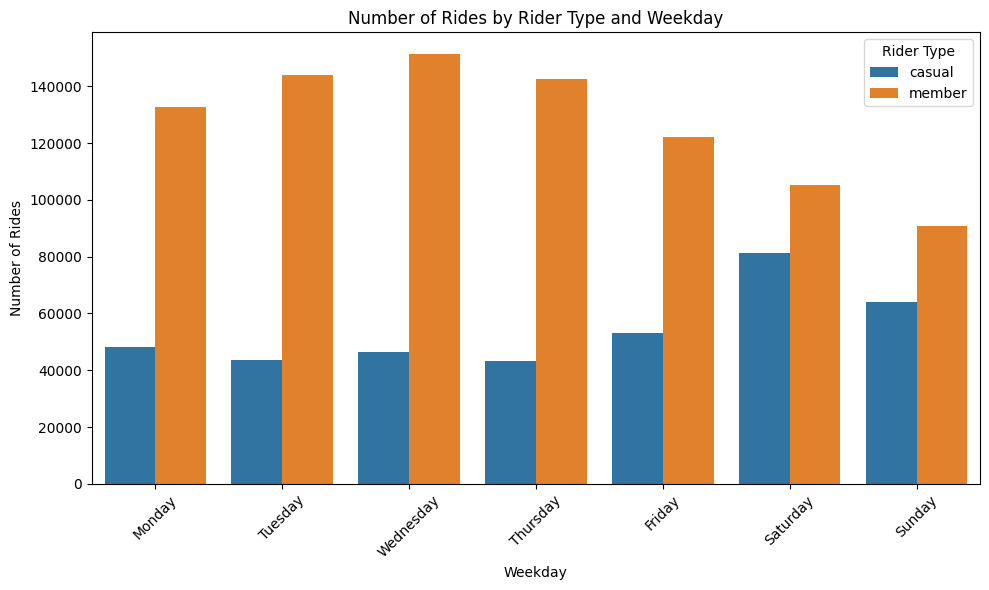

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full_year_cleaned_V04' is a DataFrame
# Create a new column for the weekday (full name of the day)
full_year_cleaned['weekday'] = pd.to_datetime(full_year_cleaned['started_at']).dt.day_name()

# Grouping by member type and weekday, then calculating the number of rides and average duration
rides_by_day = full_year_cleaned.groupby(['member_casual', 'weekday']).agg(
    number_of_rides=('ride_length', 'size'),  # Number of rides
    average_duration=('ride_length', lambda x: x.mean() / 60)  # Average ride duration in minutes
).reset_index()

# Sorting the data by member_casual and weekday for proper visualization
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rides_by_day['weekday'] = pd.Categorical(rides_by_day['weekday'], categories=weekday_order, ordered=True)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='number_of_rides', hue='member_casual', data=rides_by_day, dodge=True)

# Adding titles and labels
plt.title('Number of Rides by Rider Type and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Rider Type')

# Displaying the plot
plt.tight_layout()
plt.show()


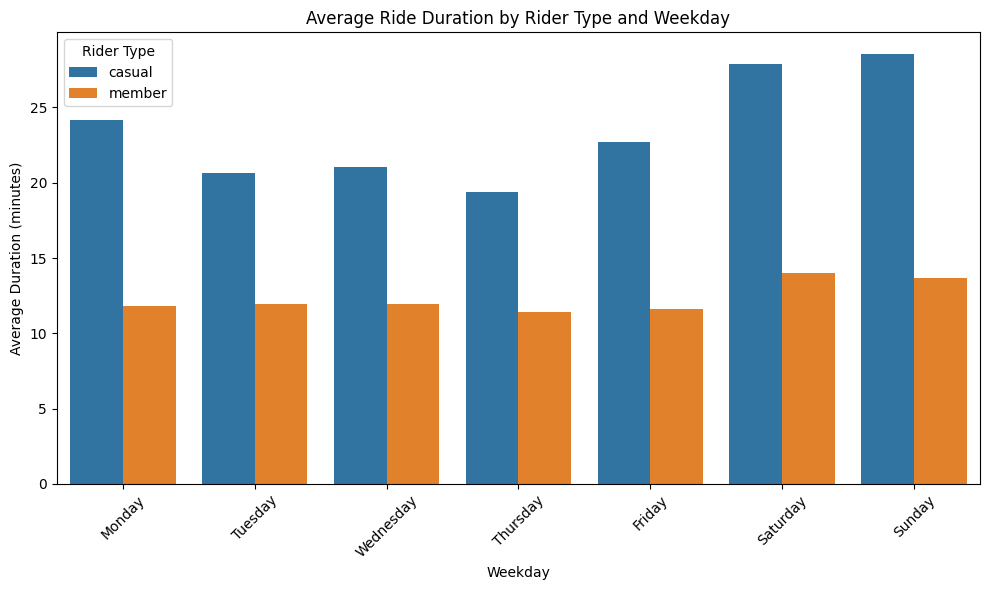

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full_year_cleaned_V04' is a DataFrame
# Create a new column for the weekday (full name of the day)
full_year_cleaned['weekday'] = pd.to_datetime(full_year_cleaned['started_at']).dt.day_name()

# Grouping by member type and weekday, then calculating the number of rides and average duration
rides_by_day_duration = full_year_cleaned.groupby(['member_casual', 'weekday']).agg(
    number_of_rides=('ride_length', 'size'),  # Number of rides
    average_duration=('ride_length', lambda x: x.mean() / 60)  # Average ride duration in minutes
).reset_index()

# Sorting the data by member_casual and weekday for proper visualization
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rides_by_day_duration['weekday'] = pd.Categorical(rides_by_day_duration['weekday'], categories=weekday_order, ordered=True)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='average_duration', hue='member_casual', data=rides_by_day_duration, dodge=True)

# Adding titles and labels
plt.title('Average Ride Duration by Rider Type and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Rider Type')

# Displaying the plot
plt.tight_layout()
plt.show()


# Key findings
# Bike trips

Casual riders make up 43% of the total amount of trips taken as opposed to 57% for members.

Both casual and members show the same trend of bike trips throughout the year. Peaking between June and October.

Member bike trips stay up a month longer to November before experiencing the same steep drop off.

Casual riders primarily take trips on the weekends. Members take trips more evenly spread out over the week.

Most bike trips for casual riders start between 12.00 and 18.00. The starting time for members shows a morning peak between 6.00 and 9.00.
#Ride length
Casual riders (37 minutes) use their bikes 2.4 times longer than members. (16 minutes)

Casual rider ride length peaks between june and october. Members maintain a more steady ride length throughout the year.

Ride length increases on Friday, Saturday and Sunday for casual riders. For members the average trip length does not vary much per week day.
#Bike types
Docked bikes are by far the most used bike type by both members and casual riders.

The classical bike is used significantly less by casual riders than members.
#Bussiness statement:
#How do annual members and casual riders use rental bikes differently?

The data shows that casual riders primarily take bike trips during the weekend as opposed to members who take bike trips more evenly spread throughout the week. Casual riders on average also take 2.4 times longer for a single trip, starting their trips later in the day. Both casuals and members take bike trips primarily during the warmer months with a steep decline during the colder months of the year.

We can therefore conclude that casuals riders on average use the Cyclistic bike services primarily for leisure and not to commute from and to work. At the moment Cyclistic offers a single annual membership which does not benefit casual riders as they primarily take trips on the weekends and during the warmer months. My top 3 recommendations therefore are designed to better fit the needs of casual riders.

#Top 3 recommendations
1. Offer a weekend-only membership at a different price point than the full annual membership to entice casual users towards a full annual membership that is valid from Fridays to Sundays.

2. Offer a half year only_membership from May to October instead of the full year annual membership.

3. Combining the above described recommendations, a third option would be to create a half_year_only membership that is only valid on Friday to Sunday.
#To the marketing department:
Below I've included a list of the top 20 most used start and end stations, as well as a list with the most popular routes with the average trip length for each station.

In [52]:
import pandas as pd


# Count the occurrences of each start station
start_station_counts = full_year_cleaned['start_station_name'].value_counts().head(20)

# Count the occurrences of each end station
end_station_counts = full_year_cleaned['end_station_name'].value_counts().head(20)

# Print the top 20 most used start stations
print("Top 20 Most Used Start Stations:")
print(start_station_counts)

# Print the top 20 most used end stations
print("\nTop 20 Most Used End Stations:")
print(end_station_counts)


Top 20 Most Used Start Stations:
start_station_name
Streeter Dr & Grand Ave               15683
DuSable Lake Shore Dr & Monroe St     11207
Clinton St & Washington Blvd          11144
Kingsbury St & Kinzie St              10686
University Ave & 57th St              10384
Clark St & Elm St                      9581
Clinton St & Madison St                9537
Ellis Ave & 60th St                    8653
Michigan Ave & Oak St                  8508
Wells St & Elm St                      8243
Wells St & Concord Ln                  7907
DuSable Lake Shore Dr & North Blvd     7836
Indiana Ave & Roosevelt Rd             7765
Dearborn St & Erie St                  7570
Millennium Park                        7547
Clinton St & Jackson Blvd              7463
Canal St & Adams St                    7084
Wabash Ave & Grand Ave                 6822
Theater on the Lake                    6741
Wells St & Hubbard St                  6738
Name: count, dtype: int64

Top 20 Most Used End Stations:
end_statio